In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions 
import tensorflow_hub as hub

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [4]:
hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (250,250,3), name = 'Efficientnet_b0')

2023-08-02 23:02:15.552170: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
reloaded_model = tf.keras.models.load_model("./food_recognition_efficientnet_145class.h5", custom_objects={'KerasLayer':hub.KerasLayer})
print(reloaded_model.get_config())

reloaded_model.build((None, 250, 250, 3))
reloaded_model.summary()

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 250, 250, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'Resnet_V2_50_input'}}, {'class_name': 'KerasLayer', 'config': {'name': 'Resnet_V2_50', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, 250, 250, 3), 'handle': 'https://tfhub.dev/google/efficientnet/b0/classification/1', 'signature': 'default', 'output_key': 'default'}}, {'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'Output_layer', 'trainable': True, 'dtype': 'float32', 'units': 145, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': N

In [6]:
class_map = {'가리비': 0, '가지볶음': 1, '간장게장': 2, '갈비구이': 3, '갈비찜': 4, '갈비탕': 5, '갈치구이': 6, '갈치조림': 7, '감자전': 8, '감자조림': 9, '감자탕': 10, '감자튀김': 11, '갓김치': 12, '건새우볶음': 13, '경단': 14, '계란국': 15, '계란말이': 16, '계란찜': 17, '계란후라이': 18, '고등어구이': 19, '고등어조림': 20, '고추튀김': 21, '곰탕_설렁탕': 22, '곱창구이': 23, '곱창전골': 24, '구운 연어': 25, '굴': 26, '김밥': 27, '김치전': 28, '김치찌개': 29, '깍두기': 30, '꼬막찜': 31, '꽁치조림': 32, '꿀떡': 33, '나초': 34, '누룽지': 35, '닭갈비': 36, '닭볶음탕': 37, '당근케익': 38, '도넛': 39, '도라지무침': 40, '도토리묵': 41, '동태찌개': 42, '돼지갈비': 43, '된장찌개': 44, '두부조림': 45, '떡갈비': 46, '떡국_만두국': 47, '떡꼬치': 48, '떡볶이': 49, '라멘': 50, '라면': 51, '라볶이': 52, '마늘빵': 53, '마카롱': 54, '막국수': 55, '만두': 56, '매운탕': 57, '무국': 58, '물냉면': 59, '물회': 60, '미역국': 61, '배추김치': 62, '백김치': 63, '볶음밥': 64, '부리토': 65, '불고기': 66, '비빔냉면': 67, '비빔밥': 68, '산낙지': 69, '삼겹살': 70, '삼계탕': 71, '새우볶음밥': 72, '새우튀김': 73, '샌드위치': 74, '샐러드': 75, '소세지볶음': 76, '송편': 77, '수육': 78, '숙주나물': 79, '순대': 80, '순두부찌개': 81, '스테이크': 82, '스파케티': 83, '시금치나물': 84, '시래기국': 85, '식혜': 86, '쌀국수': 87, '아이스크림': 88, '알밥': 89, '애플파이': 90, '약과': 91, '양념게장': 92, '어니언링': 93, '어묵볶음': 94, '열무김치': 95, '오믈렛': 96, '오징어채볶음': 97, '오징어튀김': 98, '와플': 99, '요거트': 100, '유부초밥': 101, '육개장': 102, '육회': 103, '잔치국수': 104, '잡채': 105, '장어구이': 106, '장조림': 107, '전복죽': 108, '젓갈': 109, '제육볶음': 110, '조개구이': 111, '조기구이': 112, '족발_보쌈': 113, '주꾸미볶음': 114, '주먹밥': 115, '짜장면': 116, '짬뽕': 117, '쫄면': 118, '찜닭': 119, '초밥': 120, '초콜렛 무스': 121, '추러스': 122, '치즈': 123, '치킨': 124, '칼국수': 125, '컵케익': 126, '케이크': 127, '콩국수': 128, '콩나물국': 129, '토스트': 130, '티라미수': 131, '파김치': 132, '파전': 133, '팬케이크': 134, '푸아그라': 135, '피자': 136, '핫도그': 137, '해물찜': 138, '햄버거': 139, '호박전': 140, '홍합': 141, '회': 142, '회무침': 143, '훈제오리': 144}
classes = []
for key in class_map.keys():
    classes.append(key)
print(class_map)

{'가리비': 0, '가지볶음': 1, '간장게장': 2, '갈비구이': 3, '갈비찜': 4, '갈비탕': 5, '갈치구이': 6, '갈치조림': 7, '감자전': 8, '감자조림': 9, '감자탕': 10, '감자튀김': 11, '갓김치': 12, '건새우볶음': 13, '경단': 14, '계란국': 15, '계란말이': 16, '계란찜': 17, '계란후라이': 18, '고등어구이': 19, '고등어조림': 20, '고추튀김': 21, '곰탕_설렁탕': 22, '곱창구이': 23, '곱창전골': 24, '구운 연어': 25, '굴': 26, '김밥': 27, '김치전': 28, '김치찌개': 29, '깍두기': 30, '꼬막찜': 31, '꽁치조림': 32, '꿀떡': 33, '나초': 34, '누룽지': 35, '닭갈비': 36, '닭볶음탕': 37, '당근케익': 38, '도넛': 39, '도라지무침': 40, '도토리묵': 41, '동태찌개': 42, '돼지갈비': 43, '된장찌개': 44, '두부조림': 45, '떡갈비': 46, '떡국_만두국': 47, '떡꼬치': 48, '떡볶이': 49, '라멘': 50, '라면': 51, '라볶이': 52, '마늘빵': 53, '마카롱': 54, '막국수': 55, '만두': 56, '매운탕': 57, '무국': 58, '물냉면': 59, '물회': 60

In [7]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(250, 250))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)

    indexk = np.argsort(prediction[0,:])[::-1]

    for i in range(10):
        print("{}. {} ({:.3})".format(i+1, classes[indexk[i]], prediction[0, indexk[i]]))

    index = np.argmax(prediction)
    print()
    print(classes[index])
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 1s 826ms/step
1. 잔치국수 (0.983)
2. 칼국수 (0.0118)
3. 라멘 (0.00446)
4. 비빔밥 (0.000165)
5. 콩국수 (8.1e-05)
6. 콩나물국 (4.48e-05)
7. 떡국_만두국 (1.8e-05)
8. 수육 (1.48e-05)
9. 물냉면 (8.36e-06)
10. 짬뽕 (7.91e-06)

잔치국수


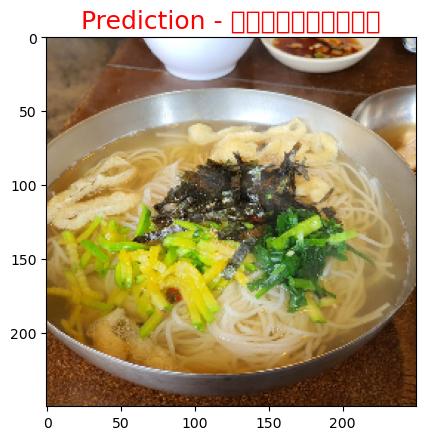

In [9]:
predict_image("./test/잔치국수.jpeg", reloaded_model)